In [1]:
!pip3 install torch

In [0]:
import torch
from torch import nn as nn
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def create_dataset():
  n_pts = 100
  centers = [[-0.5, 0.5], [0.5, -0.5]]
  X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
  x_data = torch.Tensor(X)
  y_data = torch.Tensor(y.reshape((100, 1)))
  return X, y, x_data, y_data

X, y, x_data, y_data = create_dataset()

In [0]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1], c="r")
  plt.scatter(X[y==1, 0], X[y==1, 1], c="b")

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(in_features=input_size, out_features=output_size)
    
  def forward(self, X):
    pred = torch.sigmoid(self.linear(X)) # 二値分類
    return pred
  
  def predict(self, X):
    pred = self.forward(X)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [6]:
torch.manual_seed(2)
model = Model(input_size=2, output_size=1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [0]:
def get_param():
  [w, b] = model.parameters()
  w1, w2 = w.view(2)
  b1 = b[0]
  return w1.item(), w2.item(), b1.item() #item -> scaler

In [0]:
def plot_fit(title):
  plt.title = title
#   0 = w1x1 + w2x2 + b
  w1, w2, b1 = get_param()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1 * x1 + b1)/ -w2
  plt.plot(x1, x2, "r")
  scatter_plot()

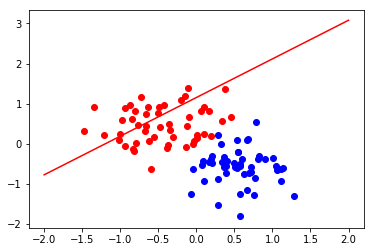

In [9]:
plot_fit("initial model")

In [0]:
# 損失関数
criterion = nn.BCELoss()

# 最適化(paramterを指す)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

In [11]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data) #損失関数の計算
  print("epoch: ", i, "loss: ", loss.item())
  
  losses.append(loss.item())
  
  # 最適化
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  
  
  

epoch:  0 loss:  0.6185115575790405
epoch:  1 loss:  0.6174639463424683
epoch:  2 loss:  0.6164201498031616
epoch:  3 loss:  0.6153794527053833
epoch:  4 loss:  0.614342451095581
epoch:  5 loss:  0.6133086681365967
epoch:  6 loss:  0.6122783422470093
epoch:  7 loss:  0.6112515330314636
epoch:  8 loss:  0.6102280616760254
epoch:  9 loss:  0.6092080473899841
epoch:  10 loss:  0.6081910729408264
epoch:  11 loss:  0.6071775555610657
epoch:  12 loss:  0.606167733669281
epoch:  13 loss:  0.6051608920097351
epoch:  14 loss:  0.604157567024231
epoch:  15 loss:  0.6031574606895447
epoch:  16 loss:  0.602160632610321
epoch:  17 loss:  0.6011670827865601
epoch:  18 loss:  0.6001767516136169
epoch:  19 loss:  0.599189817905426
epoch:  20 loss:  0.5982059240341187
epoch:  21 loss:  0.5972254276275635
epoch:  22 loss:  0.5962479114532471
epoch:  23 loss:  0.5952739119529724
epoch:  24 loss:  0.5943028926849365
epoch:  25 loss:  0.5933352112770081
epoch:  26 loss:  0.5923705101013184
epoch:  27 loss:

Text(0.5, 0, 'epoch')

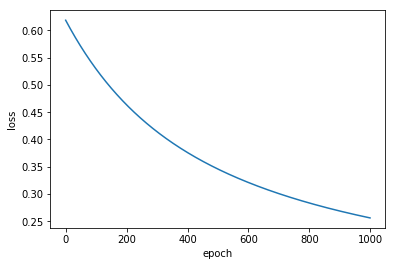

In [12]:
plt.plot(range(epochs), losses)
plt.ylabel("loss")
plt.xlabel("epoch")

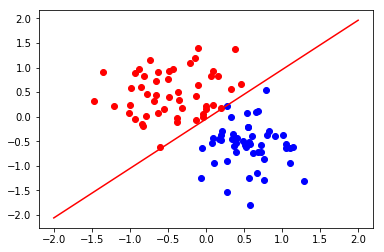

In [13]:
plot_fit("Trained Model")

Red point positive probability = 0.9424158334732056
Black point positive probability = 0.05055497586727142
Red point in class = 1
Black point in class = 0


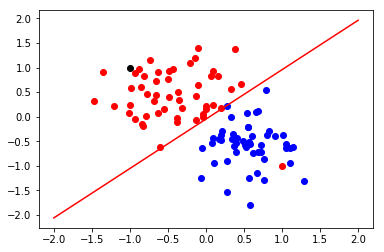

In [16]:
point1  =torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], "ro")
plt.plot(point2.numpy()[0], point2.numpy()[1], "ko")
print("Red point positive probability = {}".format(model.forward(point1).item()))
print("Black point positive probability = {}".format(model.forward(point2).item()))
print("Red point in class = {}".format(model.predict(point1)))
print("Black point in class = {}".format(model.predict(point2)))
plot_fit("Trained Model")